In [3]:
import torch as th
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import time

In [4]:
def q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
  # Доступ к Q-network
  q_net = model.q_net

  # Конвертируем observation в PyTorch tensor
  obs_tensor = th.tensor(obs, dtype=th.float32)

  # Изменяем размерность
  obs_tensor = obs_tensor.unsqueeze(0)

  #Извлекаем Q-values
  q_values = model.q_net.forward(obs_tensor)

  return q_values.detach().numpy()[0]

In [5]:
def plot_q_values(q_values_list):
  # Извлечение отдельных списков для каждого Q-значения
  q1_values, q2_values, q3_values, q4_values = zip(*q_values_list)

  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.plot(q1_values, label='Q1 Values')
  plt.plot(q2_values, label='Q2 Values')
  plt.plot(q3_values, label='Q3 Values')
  plt.plot(q4_values, label='Q4 Values')
  plt.xlabel('Time')
  plt.ylabel('Q-Values')
  plt.title('Convergence of Q-Values over Time')
  plt.legend()
  plt.show()

In [6]:
def mean_reward(discount_factor):
  #Создание окружения
  env = gym.make("LunarLander-v2")

  #Создание модели
  model = DQN("MlpPolicy", env, verbose=1, gamma=discount_factor)

  #Количество эпизодов для оценки модели
  n_eval_episodes = 250

  #Оценка модели до обучения
  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2"), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"До обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

  # Засекаем начальное время
  start_time = time.time()

  #Обучение модели
  model.learn(total_timesteps=3000000, log_interval=100)

  # Засекаем время завершения
  end_time = time.time()

  #Оценка модели после обучения
  mean_reward, std_reward = evaluate_policy(model, gym.make("LunarLander-v2"), deterministic=True, n_eval_episodes=n_eval_episodes)
  print(f"После обучения модели с discount_factor = {discount_factor}, mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")
  model.save(f"dqn_cartpole_{discount_factor}")
  del model

  # Вычисляем время обучений
  learn_time = end_time - start_time
  return env, learn_time

In [7]:
def q_values_calculation(discount_factor, env):
  #Загружаем созданную и созраненную модель
  model = DQN.load(f"dqn_cartpole_{discount_factor}")

  #В CartPole окружении возможны только 4 действия
  action_str = ['do_nothing','left_engine','main_engine','right_engine']
  q_values_list = []

  obs, info = env.reset()
  for _ in range(100):
      q_val = q_values(model,obs)
      q_values_list.append(q_val)
      action, _states = model.predict(obs, deterministic=True)

      print(f"Q-value состояния do_nothing={q_val[0]:.2f} left_engine={q_val[1]:.2f} main_engine={q_val[2]:.2f} right_engine={q_val[3]:.2f}")
      print(f"Действие: {action_str[action]}")

      obs, reward, terminated, truncated, info = env.step(action)

  return q_values_list

In [8]:
discount_factors = [0.01,0.05,0.1, 0.5,0.99]

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/alexeyyakushev/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


До обучения модели с discount_factor = 0.01, mean_reward:-303.21 +/- 152.29
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.5     |
|    ep_rew_mean      | -161     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 24067    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9145     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89       |
|    ep_rew_mean      | -187     |
|    exploration_rate | 0.943    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 24017    |
|    time_elapsed     | 0        |
|    total_timesteps  | 18042    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.8     |
|    ep_rew_mean      | -184     |
|    explorati

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 421      |
|    ep_rew_mean      | -14.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 4930     |
|    time_elapsed     | 74       |
|    total_timesteps  | 367637   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.952    |
|    n_updates        | 79409    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 398      |
|    ep_rew_mean      | -36.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 4830     |
|    time_elapsed     | 84       |
|    total_timesteps  | 407486   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 336      |
|    ep_rew_mean      | -11.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 4297     |
|    time_elapsed     | 219      |
|    total_timesteps  | 944290   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.198    |
|    n_updates        | 223572   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 336      |
|    ep_rew_mean      | -20.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 4280     |
|    time_elapsed     | 228      |
|    total_timesteps  | 977907   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.608    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 317      |
|    ep_rew_mean      | -46.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 4182     |
|    time_elapsed     | 345      |
|    total_timesteps  | 1445467  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.289    |
|    n_updates        | 348866   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 344      |
|    ep_rew_mean      | -12.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 4180     |
|    time_elapsed     | 354      |
|    total_timesteps  | 1479872  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.139    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 311      |
|    ep_rew_mean      | -39      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 4147     |
|    time_elapsed     | 474      |
|    total_timesteps  | 1966646  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.176    |
|    n_updates        | 479161   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 319      |
|    ep_rew_mean      | -2.96    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6700     |
|    fps              | 4146     |
|    time_elapsed     | 481      |
|    total_timesteps  | 1998552  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.914    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 332      |
|    ep_rew_mean      | 4.84     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8200     |
|    fps              | 4129     |
|    time_elapsed     | 602      |
|    total_timesteps  | 2490077  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.257    |
|    n_updates        | 610019   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 329      |
|    ep_rew_mean      | -54.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8300     |
|    fps              | 4129     |
|    time_elapsed     | 611      |
|    total_timesteps  | 2523011  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.592    |
|    n_updates      

После обучения модели с discount_factor = 0.01, mean_reward:-33.67 +/- 166.55
Q-value состояния do_nothing=-1.07 left_engine=-0.01 main_engine=1.46 right_engine=-2.05
Действие: main_engine
Q-value состояния do_nothing=-1.30 left_engine=-0.23 main_engine=1.00 right_engine=-2.31
Действие: main_engine
Q-value состояния do_nothing=-1.44 left_engine=-0.35 main_engine=0.70 right_engine=-2.49
Действие: main_engine
Q-value состояния do_nothing=-1.55 left_engine=-0.43 main_engine=0.60 right_engine=-2.61
Действие: main_engine
Q-value состояния do_nothing=-1.44 left_engine=-0.32 main_engine=0.48 right_engine=-2.54
Действие: main_engine
Q-value состояния do_nothing=-1.46 left_engine=-0.33 main_engine=0.33 right_engine=-2.60
Действие: main_engine
Q-value состояния do_nothing=-1.55 left_engine=-0.40 main_engine=0.18 right_engine=-2.71
Действие: main_engine
Q-value состояния do_nothing=-1.63 left_engine=-0.45 main_engine=0.03 right_engine=-2.81
Действие: main_engine
Q-value состояния do_nothing=-1.50

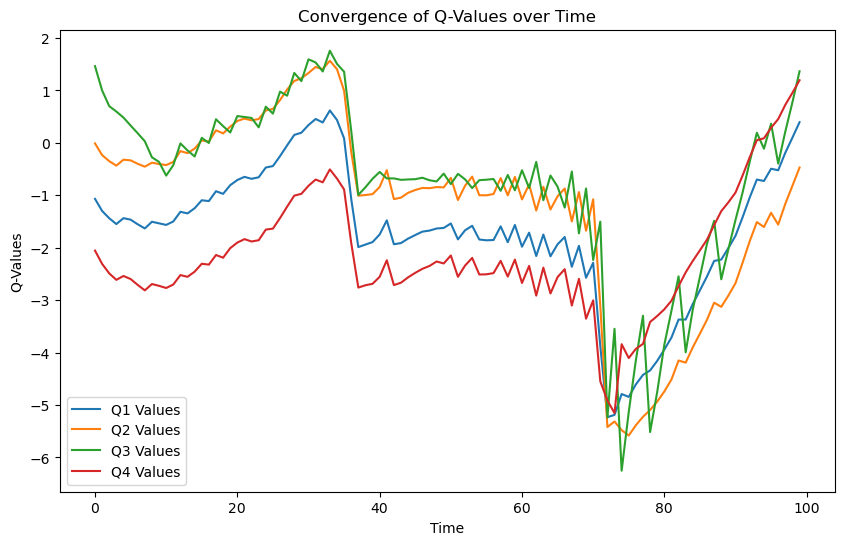

Время обучения модели при discount_factor = 0.01 : 728.5274510383606 секунд.


In [9]:
environment, time_to_lrn = mean_reward(discount_factors[0])
q_vals = q_values_calculation(discount_factors[0], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[0]} : {time_to_lrn} секунд.')

In [10]:
# Закрытие среды
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.05, mean_reward:-1098.09 +/- 1150.39
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91       |
|    ep_rew_mean      | -181     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 23625    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9104     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.7     |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.944    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 23760    |
|    time_elapsed     | 0        |
|    total_timesteps  | 17771    |
----------------------------------
----------------------------------
| rollout/            |

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 426      |
|    ep_rew_mean      | -68.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 4875     |
|    time_elapsed     | 73       |
|    total_timesteps  | 359415   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.554    |
|    n_updates        | 77353    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 433      |
|    ep_rew_mean      | -7.99    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 4750     |
|    time_elapsed     | 84       |
|    total_timesteps  | 402752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 347      |
|    ep_rew_mean      | -32.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 4358     |
|    time_elapsed     | 212      |
|    total_timesteps  | 928050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.813    |
|    n_updates        | 219512   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 355      |
|    ep_rew_mean      | -4.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 4349     |
|    time_elapsed     | 221      |
|    total_timesteps  | 963532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.366    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -51.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 4257     |
|    time_elapsed     | 341      |
|    total_timesteps  | 1455996  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.144    |
|    n_updates        | 351498   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 342      |
|    ep_rew_mean      | -37.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 4253     |
|    time_elapsed     | 350      |
|    total_timesteps  | 1490222  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.979    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 324      |
|    ep_rew_mean      | -44.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 4205     |
|    time_elapsed     | 467      |
|    total_timesteps  | 1967118  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.225    |
|    n_updates        | 479279   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 307      |
|    ep_rew_mean      | -35.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6700     |
|    fps              | 4203     |
|    time_elapsed     | 475      |
|    total_timesteps  | 1997807  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.469    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 309      |
|    ep_rew_mean      | -46.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8200     |
|    fps              | 2484     |
|    time_elapsed     | 994      |
|    total_timesteps  | 2471305  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.13     |
|    n_updates        | 605326   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 336      |
|    ep_rew_mean      | -54      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8300     |
|    fps              | 2497     |
|    time_elapsed     | 1003     |
|    total_timesteps  | 2504916  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.463    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -27.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9800     |
|    fps              | 2663     |
|    time_elapsed     | 1120     |
|    total_timesteps  | 2984833  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.281    |
|    n_updates        | 733708   |
----------------------------------
После обучения модели с discount_factor = 0.05, mean_reward:-52.20 +/- 157.44
Q-value состояния do_nothing=-0.62 left_engine=0.33 main_engine=-0.51 right_engine=-1.82
Действие: left_engine
Q-value состояния do_nothing=-0.56 left_engine=0.35 main_engine=-0.30 right_engine=-1.75
Действие: left_engine
Q-value состояния do_nothing=-0.43 left_engine=0.44 main_engine=0.04 right_engine=-1.60
Действие: left_engine
Q-value состояния do_nothing=-0.31 left_engine=0.57 main_engine=0

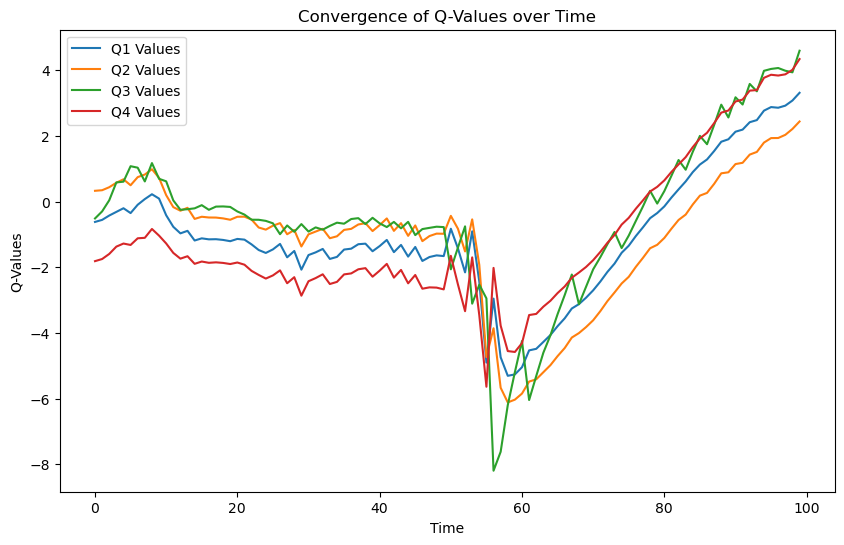

Время обучения модели при discount_factor = 0.05 : 1124.236025094986 секунд.


In [11]:
environment, time_to_lrn = mean_reward(discount_factors[1])
q_vals = q_values_calculation(discount_factors[1], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[1]} : {time_to_lrn} секунд.')

In [12]:
# Закрытие среды
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.1, mean_reward:-579.13 +/- 167.32
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.1     |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 24268    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9010     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.6     |
|    ep_rew_mean      | -189     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 24148    |
|    time_elapsed     | 0        |
|    total_timesteps  | 18369    |
----------------------------------
----------------------------------
| rollout/            |   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 476      |
|    ep_rew_mean      | -12.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 4897     |
|    time_elapsed     | 77       |
|    total_timesteps  | 380001   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.626    |
|    n_updates        | 82500    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 406      |
|    ep_rew_mean      | -17.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 4809     |
|    time_elapsed     | 87       |
|    total_timesteps  | 420609   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.701    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 334      |
|    ep_rew_mean      | -37.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 4383     |
|    time_elapsed     | 218      |
|    total_timesteps  | 959647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.495    |
|    n_updates        | 227411   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 333      |
|    ep_rew_mean      | -11      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 4373     |
|    time_elapsed     | 227      |
|    total_timesteps  | 992973   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.871    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 304      |
|    ep_rew_mean      | -37.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 4279     |
|    time_elapsed     | 346      |
|    total_timesteps  | 1481184  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.486    |
|    n_updates        | 357795   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -35.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 4275     |
|    time_elapsed     | 353      |
|    total_timesteps  | 1511474  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.411    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 344      |
|    ep_rew_mean      | -2.06    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 4230     |
|    time_elapsed     | 474      |
|    total_timesteps  | 2007349  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.351    |
|    n_updates        | 489337   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 336      |
|    ep_rew_mean      | -23.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6700     |
|    fps              | 4228     |
|    time_elapsed     | 482      |
|    total_timesteps  | 2040958  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.521    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 328      |
|    ep_rew_mean      | -3.05    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8200     |
|    fps              | 4202     |
|    time_elapsed     | 600      |
|    total_timesteps  | 2524788  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates        | 618696   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 312      |
|    ep_rew_mean      | -19.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8300     |
|    fps              | 4201     |
|    time_elapsed     | 608      |
|    total_timesteps  | 2555994  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.397    |
|    n_updates      

После обучения модели с discount_factor = 0.1, mean_reward:-43.10 +/- 163.83
Q-value состояния do_nothing=-0.97 left_engine=-0.40 main_engine=1.71 right_engine=-1.54
Действие: main_engine
Q-value состояния do_nothing=-1.01 left_engine=-0.29 main_engine=1.28 right_engine=-1.69
Действие: main_engine
Q-value состояния do_nothing=-0.88 left_engine=-0.08 main_engine=0.90 right_engine=-1.66
Действие: main_engine
Q-value состояния do_nothing=-0.90 left_engine=-0.02 main_engine=0.56 right_engine=-1.76
Действие: main_engine
Q-value состояния do_nothing=-0.82 left_engine=0.10 main_engine=0.59 right_engine=-1.71
Действие: main_engine
Q-value состояния do_nothing=-0.73 left_engine=0.24 main_engine=0.50 right_engine=-1.67
Действие: main_engine
Q-value состояния do_nothing=-0.72 left_engine=0.30 main_engine=0.37 right_engine=-1.68
Действие: main_engine
Q-value состояния do_nothing=-0.73 left_engine=0.31 main_engine=0.30 right_engine=-1.71
Действие: left_engine
Q-value состояния do_nothing=-0.47 left

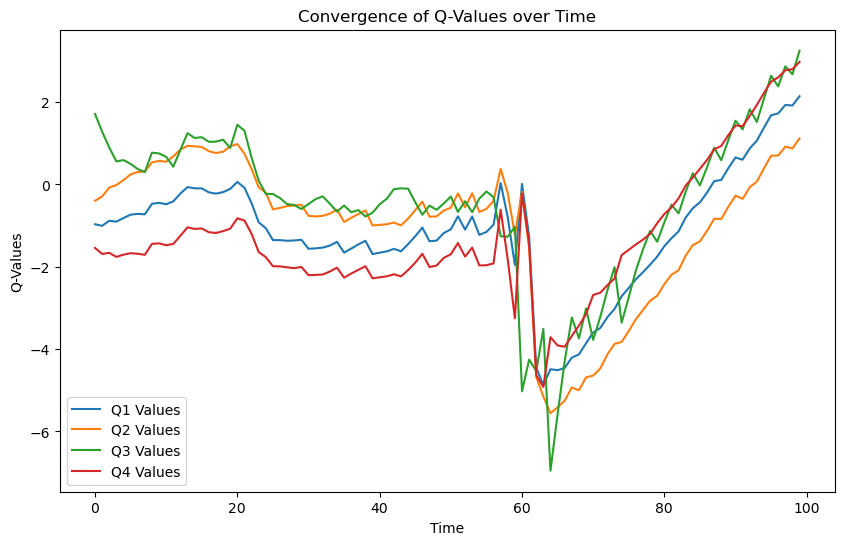

Время обучения модели при discount_factor = 0.1 : 716.936830997467 секунд.


In [13]:
environment, time_to_lrn = mean_reward(discount_factors[2])
q_vals = q_values_calculation(discount_factors[2], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[2]} : {time_to_lrn} секунд.')

In [14]:
# Закрытие среды
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.5, mean_reward:-134.34 +/- 47.70
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.9     |
|    ep_rew_mean      | -182     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 24224    |
|    time_elapsed     | 0        |
|    total_timesteps  | 8989     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | -184     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 24339    |
|    time_elapsed     | 0        |
|    total_timesteps  | 18547    |
----------------------------------
----------------------------------
| rollout/            |    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 384      |
|    ep_rew_mean      | -46.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 4922     |
|    time_elapsed     | 74       |
|    total_timesteps  | 366050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.778    |
|    n_updates        | 79012    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 384      |
|    ep_rew_mean      | -63.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 4817     |
|    time_elapsed     | 83       |
|    total_timesteps  | 404499   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.859    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 391      |
|    ep_rew_mean      | 14       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 4356     |
|    time_elapsed     | 219      |
|    total_timesteps  | 955046   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.962    |
|    n_updates        | 226261   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 381      |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 4344     |
|    time_elapsed     | 228      |
|    total_timesteps  | 993115   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.533    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 323      |
|    ep_rew_mean      | -11.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 4193     |
|    time_elapsed     | 361      |
|    total_timesteps  | 1514794  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.568    |
|    n_updates        | 366198   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 317      |
|    ep_rew_mean      | -13.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 4189     |
|    time_elapsed     | 369      |
|    total_timesteps  | 1546459  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 308      |
|    ep_rew_mean      | -24.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6600     |
|    fps              | 4160     |
|    time_elapsed     | 487      |
|    total_timesteps  | 2029455  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.497    |
|    n_updates        | 494863   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 342      |
|    ep_rew_mean      | -22.4    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6700     |
|    fps              | 4159     |
|    time_elapsed     | 496      |
|    total_timesteps  | 2063646  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.972    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 359      |
|    ep_rew_mean      | -19.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8200     |
|    fps              | 4140     |
|    time_elapsed     | 614      |
|    total_timesteps  | 2544969  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.465    |
|    n_updates        | 623742   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 323      |
|    ep_rew_mean      | -11.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8300     |
|    fps              | 4139     |
|    time_elapsed     | 622      |
|    total_timesteps  | 2577306  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.225    |
|    n_updates      

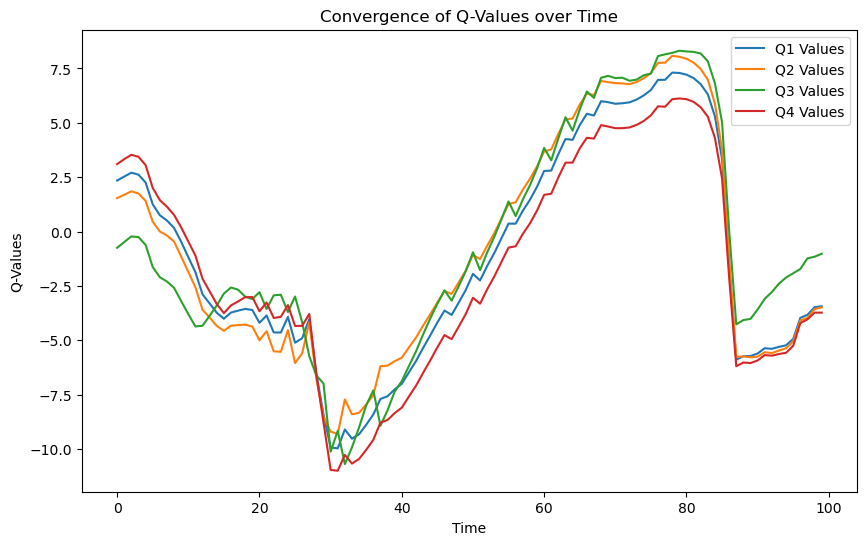

Время обучения модели при discount_factor = 0.5 : 726.9735929965973 секунд.


In [15]:
environment, time_to_lrn = mean_reward(discount_factors[3])
q_vals = q_values_calculation(discount_factors[3], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[3]} : {time_to_lrn} секунд.')

In [16]:
# Закрытие среды
environment.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
До обучения модели с discount_factor = 0.99, mean_reward:-520.95 +/- 178.82
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.1     |
|    ep_rew_mean      | -179     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 24309    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9210     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.4     |
|    ep_rew_mean      | -182     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 23969    |
|    time_elapsed     | 0        |
|    total_timesteps  | 18349    |
----------------------------------
----------------------------------
| rollout/            |  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 784      |
|    ep_rew_mean      | -56.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 4654     |
|    time_elapsed     | 113      |
|    total_timesteps  | 529957   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74     |
|    n_updates        | 119989   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 947      |
|    ep_rew_mean      | -30.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 4576     |
|    time_elapsed     | 136      |
|    total_timesteps  | 624623   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 587      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 4259     |
|    time_elapsed     | 401      |
|    total_timesteps  | 1712146  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.192    |
|    n_updates        | 415536   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 496      |
|    ep_rew_mean      | 175      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 4247     |
|    time_elapsed     | 414      |
|    total_timesteps  | 1761741  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.633    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 518      |
|    ep_rew_mean      | 216      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 4124     |
|    time_elapsed     | 611      |
|    total_timesteps  | 2520861  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0521   |
|    n_updates        | 617715   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 610      |
|    ep_rew_mean      | 189      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 4123     |
|    time_elapsed     | 626      |
|    total_timesteps  | 2581843  |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.949    |
|    n_updates      

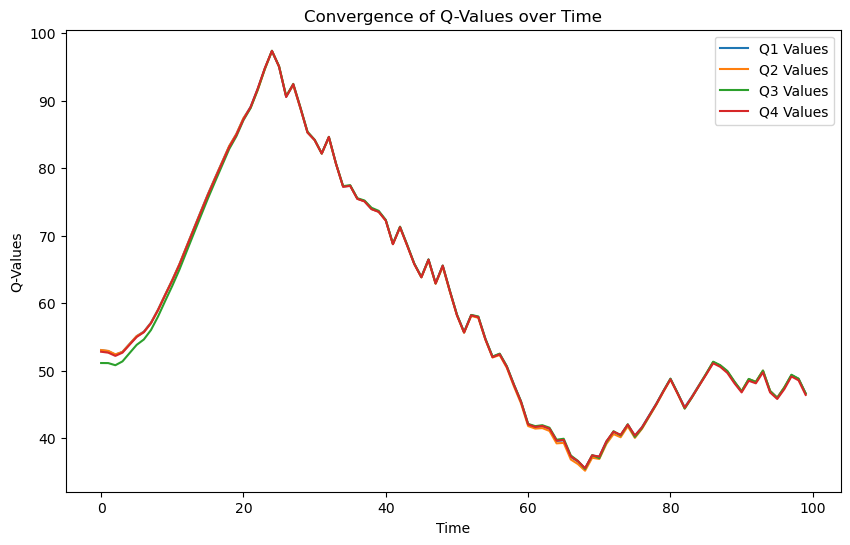

Время обучения модели при discount_factor = 0.99 : 731.5197689533234 секунд.


In [17]:
environment, time_to_lrn = mean_reward(discount_factors[4])
q_vals = q_values_calculation(discount_factors[4], environment)
plot_q_values(q_vals)
print(f'Время обучения модели при discount_factor = {discount_factors[4]} : {time_to_lrn} секунд.')

In [18]:
# Закрытие среды
environment.close()